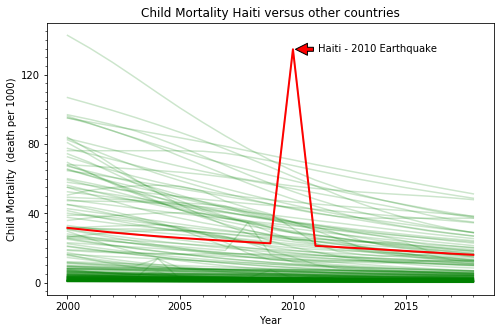

In [15]:
# importing the required libraries for plotting
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)


#creating a variable that holds the URL to the raw data stored on github
url = 'https://raw.githubusercontent.com/dirkkoolmees/child_mortality/master/Child_Mortality_CSV.csv'

#for more info on the read_csv command: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
data = pd.read_csv(url, index_col='Year')

fig, ax = plt.subplots()
#Set dimensions of the figure
fig.set_size_inches(8, 5)

#This setting creates major ticks only at multiples of 40 on the y axis and multiples of 5 on the x-axis
ax.yaxis.set_major_locator(MultipleLocator(40))
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))

#This creates minor ticks (without a value) on both axis
ax.yaxis.set_minor_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1))
#color of lines
color = 'green'
color_haiti = 'red'

#selecting only the data for one particular country
data_haiti = pd.read_csv(url,skiprows=0, index_col=0, header=0, usecols = ['Year','Haiti'])

#simpler and faster: select from the existing datafame directly:

data_haiti[['Haiti']]

#Note how you can change the color and transparancy - this applies to all lines
plt.plot(data, color = color, alpha = 0.2);

#Plot Haiti on top so that we can manipulate the color (and possily other attributes)
plt.plot(data_haiti, color = color_haiti, alpha = 1, linewidth = 2)

# Add a title and axis names
plt.title('Child Mortality Haiti versus other countries');
plt.xlabel('Year');
plt.ylabel('Child Mortality  (death per 1000)');


#annotate specific points or lines in the graph. Note how I look up the cell value for the Haiti Earthquake in 2010
#to position the arrow
y_coordinate_arrow = data["Haiti"][2010]

ax.annotate('Haiti - 2010 Earthquake',
            xy=(2010, y_coordinate_arrow), xycoords='data',
            xytext=(25, 0), textcoords='offset points',
            arrowprops=dict(facecolor= color_haiti, shrink=0.1),
            horizontalalignment='left', verticalalignment='center');

file_path_name = r"C:\Users\dirkk\Google Drive\Data_Visualization_Files\Images for the course\Module 1\Python Instructions\Haiti.png"

plt.savefig(file_path_name)